Priscilla Philby Oommen

---

PowerCo Customer Churn Analysis 2

# Feature Engineering

1. Import packages
2. Load data
3. Feature engineering

## 1. Import packages

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load data



```
# Import google drive
from google.colab import drive
drive.mount('/content/drive')
```



In [4]:
# Import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import the dataset
client_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/client_data.csv")
price_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/price_data.csv")

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [8]:
# Data Preprocessing
# Pandas to_datetime() is used to convert different data types into datetime objects.
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')

## 3. Feature engineering

### Building new dataset **clean_data_after_eda.csv** (44 features)

1) Combination of **client_data.csv** (27 features) and **price_data.csv** (8 features) into a new dataset using **id column** which is present in both the datasets.

2) Removal of columns which are irrelevant for data analysis and prediction

**activity_new** = category of the company’s activity (**client_data.csv**)

**price_date** = reference date (**price_data.csv**)

3) New features in **clean_data_after_eda.csv** dataset which are based on features in **price_data.csv** dataset

***price_data.csv***

**price_off_peak_var** = price of energy for the 1st period (off peak)

**price_peak_var** = price of energy for the 2nd period (peak)

**price_mid_peak_var** = price of energy for the 3rd period (mid peak)

**price_off_peak_fix** = price of power for the 1st period (off peak)

**price_peak_fix** = price of power for the 2nd period (peak)

**price_mid_peak_fix** = price of power for the 3rd period (mid peak)

***clean_data_after_eda.csv***

- 1 YEAR

**var_year_price_off_peak_var** = price of energy for the 1st period (off peak) for a year

**var_year_price_peak_var** = price of energy for the 2nd period (peak) for a year

**var_year_price_mid_peak_var** = price of energy for the 3rd period (mid peak) for a year

**var_year_price_off_peak_fix** = price of power for the 1st period (off peak) for a year

**var_year_price_peak_fix** = price of power for the 2nd period (peak) for a year

**var_year_price_mid_peak_fix** = price of power for the 3rd period (mid peak) for a year

- ADDITION OF PRICES OF ENERGY AND POWER FOR 1 YEAR

**var_year_price_off_peak** = price of both energy and power for the 1st period (off peak) for a year

**var_year_price_peak** = price of both energy and power for the 2nd period (peak) for a year

**var_year_price_mid_peak** = = price of both energy and power for the 3rd period (mid peak) for a year

- 6 MONTHS

**var_6m_price_off_peak_var** = price of energy for the 1st period (off peak) for 6 months

**var_6m_price_peak_var** = price of energy for the 2nd period (peak) for 6 months

**var_6m_price_mid_peak_var** = price of energy for the 3rd period (mid peak) for 6 months

**var_6m_price_off_peak_fix** = price of power for the 1st period (off peak) for 6 months

**var_6m_price_peak_fix** = price of power for the 2nd period (peak) for 6 months

**var_6m_price_mid_peak_fix** = price of power for the 3rd period (mid peak) for 6 months

- ADDITION OF PRICES OF ENERGY AND POWER FOR 6 MONTHS

**var_6m_price_off_peak** = price of both energy and power for the 1st period (off peak) for 6 months

**var_6m_price_peak** = price of both energy and power for the 2nd period (peak) for 6 months

**var_6m_price_mid_peak** = price of both energy and power for the 3rd period (mid peak) for 6 months

4) Removal of features containing price of energy and power obtained from **price_data.csv** in the new dataset **clean_data_after_eda.csv** after creating new features based on it.

***New Dataset - clean_data_after_eda.csv -  44 features***

**id** = client company identifier

**channel_sales** = code of the sales channel

**cons_12m** = electricity consumption of the past 12 months

**cons_gas_12m** = gas consumption of the past 12 months

**cons_last_month** = electricity consumption of the last month

**date_activ** = date of activation of the contract

**date_end** = registered date of the end of the contract

**date_modif_prod** = date of the last modification of the product

**date_renewal** = date of the next contract renewal

**forecast_cons_12m** = forecasted electricity consumption for next 12 months

**forecast_cons_year** = forecasted electricity consumption for the next calendar year

**forecast_discount_energy** = forecasted value of current discount

**forecast_meter_rent_12m** = forecasted bill of meter rental for the next 2 months

**forecast_price_energy_off_peak** = forecasted energy price for 1st period (off peak)

**forecast_price_energy_peak** = forecasted energy price for 2nd period (peak)

**forecast_price_pow_off_peak** = forecasted power price for 1st period (off peak)

**has_gas** = indicated if client is also a gas client

**imp_cons** = current paid consumption

**margin_gross_pow_ele** = gross margin on power subscription

**margin_net_pow_ele** = net margin on power subscription

**nb_prod_act** = number of active products and services

**net_margin** = total net margin

**num_years_antig** = antiquity of the client (in number of years)

**origin_up** = code of the electricity campaign the customer first subscribed to

**pow_max** = subscribed power

**var_year_price_off_peak_var** = price of energy for the 1st period (off peak) for a year

**var_year_price_peak_var** = price of energy for the 2nd period (peak) for a year

**var_year_price_mid_peak_var** = price of energy for the 3rd period (mid peak) for a year

**var_year_price_off_peak_fix** = price of power for the 1st period (off peak) for a year

**var_year_price_peak_fix** = price of power for the 2nd period (peak) for a year

**var_year_price_mid_peak_fix** = price of power for the 3rd period (mid peak) for a year

**var_year_price_off_peak** = price of both energy and power for the 1st period (off peak) for a year

**var_year_price_peak** = price of both energy and power for the 2nd period (peak) for a year

**var_year_price_mid_peak** = price of both energy and power for the 3rd period (mid peak) for a year

**var_6m_price_off_peak_var** = price of energy for the 1st period (off peak) for 6 months

**var_6m_price_peak_var** = price of energy for the 2nd period (peak) for 6 months

**var_6m_price_mid_peak_var** = price of energy for the 3rd period (mid peak) for 6 months

**var_6m_price_off_peak_fix** = price of power for the 1st period (off peak) for 6 months

**var_6m_price_peak_fix** = price of power for the 2nd period (peak) for 6 months

**var_6m_price_mid_peak_fix** = price of power for the 3rd period (mid peak) for 6 months

**var_6m_price_off_peak** = price of both energy and power for the 1st period (off peak) for 6 months

**var_6m_price_peak** = price of both energy and power for the 2nd period (peak) for 6 months

**var_6m_price_mid_peak** = price of both energy and power for the 3rd period (mid peak) for 6 months

**churn** = has the client churned over the next 3 months

In [9]:
# Import the dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/clean_data_after_eda.csv")

In [10]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [12]:
# Pandas to_datetime() is used to convert different data types into datetime objects.
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [14]:
# Summary statistics
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.000025,3.304264e-05,1.406015e-05,0.922810,1.460247,0.634413,0.922835,1.460280e+00,6.344275e-01,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000011,9.450150e-08,0.000000e+00,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.000011,2.896760e-06,4.860000e-10,0.007962,0.000000,0.000000,0.007973,2.896760e-06,4.860000e-10,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.005543,4.791197e-03,2.415288e-03,525.988881,399.471115,80.876029,525.994268,3.994725e+02,8.087765e+01,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.000204,2.231791e-04,1.273170e-04,18.218286,13.760009,5.895346,18.218452,1.376010e+01,5.895470e+00,0.296175


The number e is a mathematical constant approximately equal to 2.71828 that is the base of the natural logarithm and exponential function.

The letter E can have two different meaning in math, depending on whether it's a capital E or a lowercase e. You usually see the capital E on a calculator, where it means to raise the number that comes after it to a power of 10. For example, 1E6 would stand for 1 × 106, or 1 million. Normally, the use of E is reserved for numbers that would be too long to be displayed on the calculator screen if they were written out longhand.

In statistics, the symbol e is a mathematical constant approximately equal to 2.71828183. Prism switches to scientific notation when the values are very large or very small. For example: 2.3e-5, means 2.3 times ten to the minus five power, or 0.000023.4.5e6 means 4.5 times ten to the sixth power, or 4500000 which is the same as 4,500,000

This is a standard notation used by many computer programs including Excel. Entering a value in this form is not the same as entering the logarithm of a number. This is simply a shortcut way to enter very large values, or tiny fractions, without using logarithms

Note that in other contexts, e = 2.71828183, the base of natural logarithms. But when used in displaying large or small numbers, e means "times ten to the power of...".

In [15]:
# Check for missing values
# df.isnull().sum()
df.isnull().values.any() # returns True when there is at least one missing value occurring in the data.

False

In [16]:
df.duplicated().sum() # returns the number of duplicated values

0

In [17]:
# Create new feature: Contract Duration
df['contract_duration'] = (df['date_end'] - df['date_activ']).dt.days

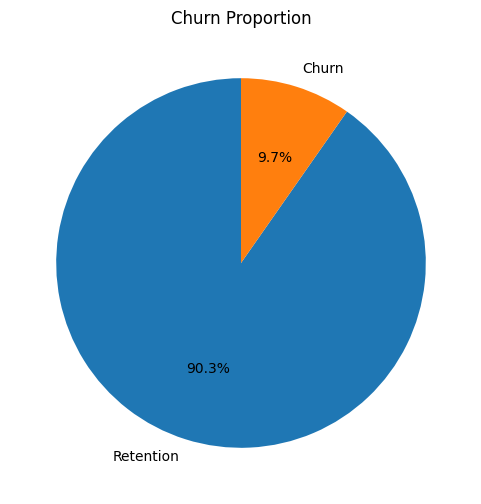

In [18]:
# Churn Proportion (Pie Chart)
# Proportion of Churn vs. Non-Churn
churn_counts = df['churn'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Retention', 'Churn'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Proportion')
plt.show()

### Difference between off-peak prices in December and preceding January

Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [19]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


### Highly Positively Skewed Data

Skewness: If the data is skewed to one side, it could mean that there are specific pricing policies or usage behaviors affecting churn in a particular direction.

Skewness is calculated by measuring how much data deviates from symmetry, and its sign (positive or negative) tells you the direction of the skew.

Skewness and Trends: Skewed distributions could imply that a small segment of customers are responsible for extremely high charges, influencing the churn behavior.

the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers

In [20]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

Similar to the consumption data, there are a lot of the variables in the forecast data that are highly positively skewed, creating a very long tail for the higher values.

In [21]:
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

correct skewness

Outlier Handling: Highly skewed data often has outliers, which can unduly influence models, especially those sensitive to extreme values (e.g., linear models). Removing or transforming outliers can help in such cases.

### Remove outliers from the dataset

In [22]:
# Feature Scaling: Quantile Transformer

# Using Quantile Transformer to remove outliers and Scale numerical features
from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer()
numerical_cols = df.drop('churn', axis='columns').select_dtypes(include=['float64', 'int64']) # Get numeric columns as dataframe
# calculate median and IQR
quantile.fit(numerical_cols) # Fit to the numerical data
dfq = quantile.transform(numerical_cols) # Transform the numerical data
# Store the transformed data back into dataframe
dfchurn = pd.DataFrame(dfq, columns=numerical_cols.columns)

In [23]:
# Add the extracted column to the second DataFrame
dfchurn = pd.concat([dfchurn, df['churn']], axis=1)

In [24]:
dfchurn

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,contract_duration,churn
0,0.000000,0.943962,0.000000,0.000000,0.000000,0.0,0.059717,0.077578,0.682182,0.165666,...,0.966826,0.992994,0.989990,0.993994,0.993493,0.990346,0.993292,0.993850,0.041041,1
1,0.208125,0.000000,0.000000,0.085434,0.000000,0.0,0.272773,0.683684,0.000000,0.613614,...,0.987988,0.000000,0.863363,0.000000,0.000000,0.877878,0.855856,0.000000,0.946490,0
2,0.024217,0.000000,0.000000,0.040563,0.000000,0.0,0.604112,0.945445,0.579079,0.613614,...,0.502503,0.000000,0.000000,0.000000,0.000000,0.236737,0.502503,0.000000,0.641141,0
3,0.054363,0.000000,0.000000,0.108072,0.000000,0.0,0.549550,0.785786,0.000000,0.613614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.082583,0.000000,0.000000,0.641141,0
4,0.196722,0.000000,0.445444,0.224854,0.553808,0.0,0.786787,0.291291,0.821321,0.165666,...,0.823323,0.737237,0.000000,0.000000,0.000000,0.431431,0.749750,0.737237,0.730365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,0.704416,0.939925,0.000000,0.905811,0.000000,0.0,0.487988,0.379880,0.000000,0.613614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.036537,0.000000,0.000000,0.089021,0
14602,0.313021,0.000000,0.370621,0.320076,0.461942,0.0,0.920921,0.014061,0.617357,0.986987,...,0.610787,0.830640,0.889463,0.959113,0.865287,0.889463,0.959101,0.865265,0.183183,1
14603,0.066752,0.000000,0.370170,0.085604,0.461461,0.0,0.700701,0.291291,0.821321,0.165666,...,0.823323,0.737237,0.000000,0.000000,0.000000,0.431431,0.749750,0.737237,0.096597,1
14604,0.014010,0.000000,0.000000,0.032413,0.000000,0.0,0.075592,0.683684,0.000000,0.613614,...,0.987988,0.000000,0.863363,0.000000,0.000000,0.877878,0.855856,0.000000,0.183183,0


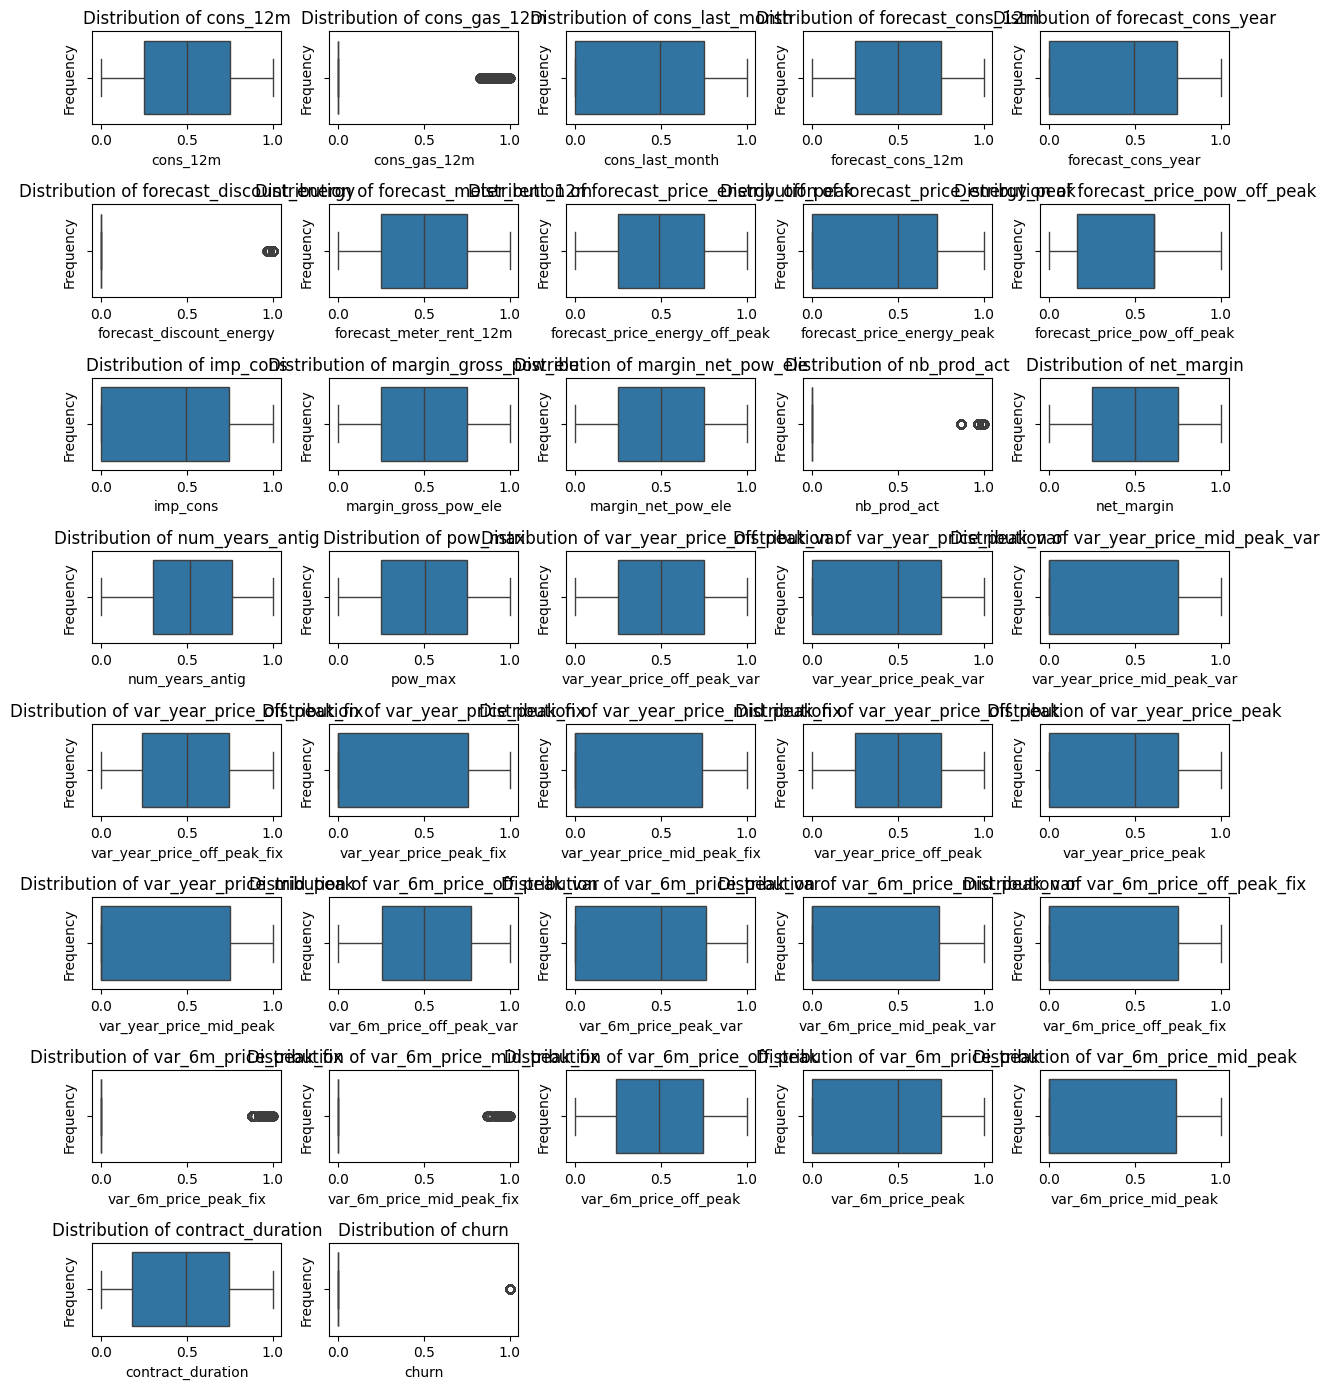

In [25]:
# Distribution of Numerical Features (Boxplot)
# Boxplots for numerical features

# Select numerical columns
#numerical_columns = client_df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplot to observe outliers
plt.figure(figsize=(12, 14)) #figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
for i, col in enumerate(dfchurn, start=1):
    plt.subplot(8, 5, i)  # Adjust rows and columns as per the number of features
    sns.boxplot(data=dfchurn, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust spacing between subplots
plt.show()

### Analysis on the influence of price sensitivity relative to churn

**Define Price Sensitivity Metrics**

Price sensitivity can be measured by analyzing fluctuations in energy and power prices, as well as how customers respond to price changes.

Key metrics include:

**1. Price Variability**

- Difference between peak and off-peak prices (price_peak_var - price_off_peak_var)

- Difference in fixed power prices (price_peak_fix - price_off_peak_fix)

**2. Relative Price Increase**

- Percentage change in price over time per customer

- Can be calculated for: price_off_peak_var, price_peak_var, price_mid_peak_var

**3. Consumption to Price Ratio**

- Ratio of energy consumption to energy price

- If this value is decreasing, the customer is paying more for less energy, which could impact churn.


In [26]:
# Create Price Sensitivity Features (client and price dataset merged or new dataset)

# Calculate price variability
dfchurn["price_variability"] = dfchurn["var_year_price_peak_var"] - dfchurn["var_year_price_off_peak_var"]

# Percentage change in price
dfchurn["price_change_off_peak"] = (dfchurn["var_year_price_off_peak_var"] - dfchurn["forecast_price_energy_off_peak"]) / dfchurn["forecast_price_energy_off_peak"]
dfchurn["price_change_peak"] = (dfchurn["var_year_price_peak_var"] - dfchurn["forecast_price_energy_peak"]) / dfchurn["forecast_price_energy_peak"]

# Consumption-to-price ratio
dfchurn["consumption_price_ratio"] = dfchurn["cons_gas_12m"] / dfchurn["forecast_price_energy_peak"]

# Fill missing values with 0 (for numerical features)
dfchurn.fillna(0, inplace=True)

# Display new features
dfchurn[["price_variability", "price_change_off_peak", "price_change_peak", "consumption_price_ratio"]].head()


,price_variability,price_change_off_peak,price_change_peak,consumption_price_ratio
0,-0.031794,11.268637,0.348580,1.383738
1,0.674675,-0.566618,inf,0.000000
2,0.065065,-0.578613,-0.199654,0.000000
3,-0.353353,-0.550318,0.000000,0.000000
4,0.047548,1.030928,-0.221816,0.000000


- Price Sensitivity Impact on Churn

Calculate price change percentages over different periods (6 months vs. 1 year) to measure sensitivity.

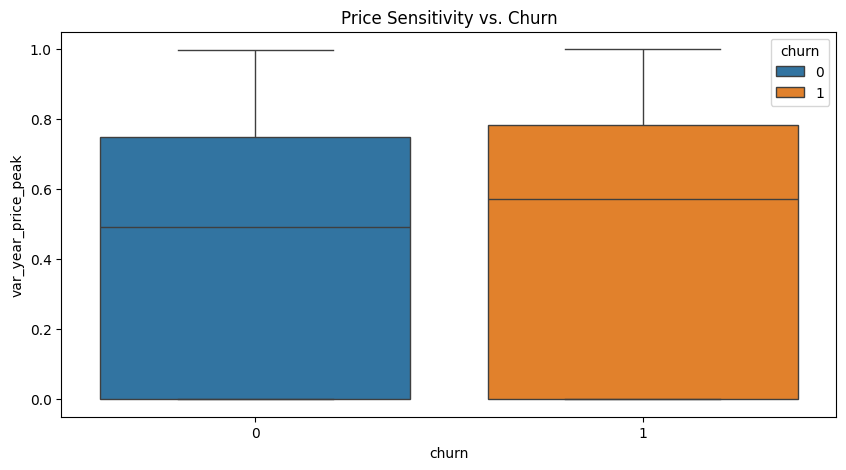

In [27]:
# Compare price changes (var_6m vs. var_year) for churned vs. retained customers.
plt.figure(figsize=(10, 5))
sns.boxplot(data=dfchurn, x='churn', y='var_year_price_peak', hue='churn')
plt.title('Price Sensitivity vs. Churn')
plt.show()

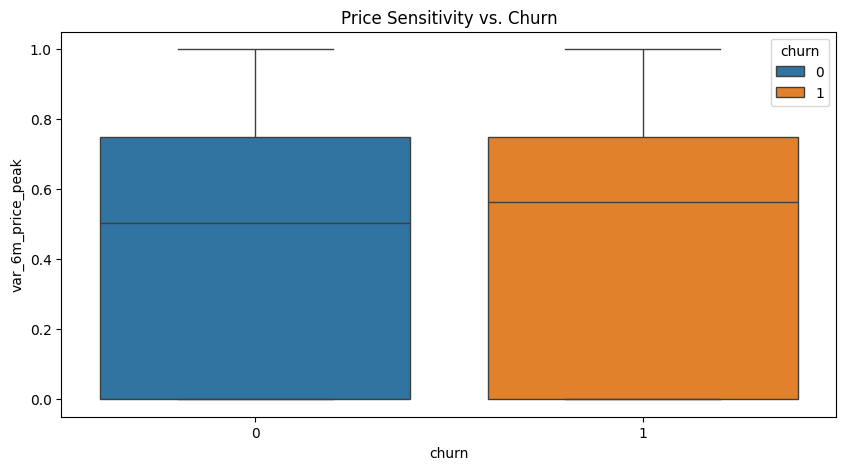

In [28]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dfchurn, x='churn', y='var_6m_price_peak', hue='churn')
plt.title('Price Sensitivity vs. Churn')
plt.show()

<ipython-input-29-75222cb6910b>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rates = df.groupby("price_quartile")["churn"].mean()


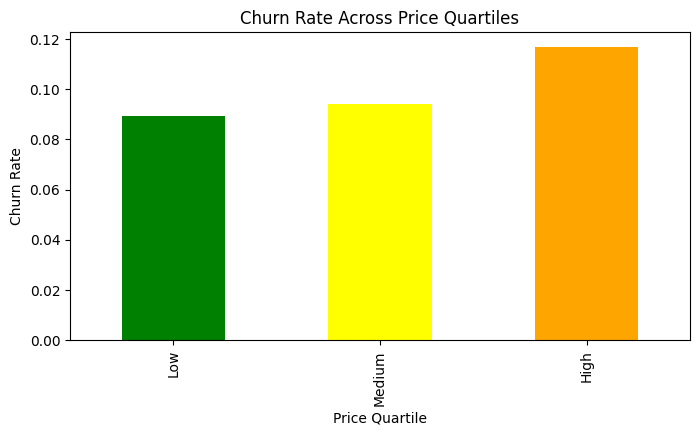

In [29]:
# Churn Probability by Price Quartiles
# First, determine the bins without labels
df["price_quartile"] = pd.qcut(df["forecast_price_energy_peak"], 4, duplicates='drop')

# Get the unique categories created by pd.qcut
unique_bins = df["price_quartile"].unique()

# Create labels that match the number of unique bins
labels = ["Low", "Medium", "High", "Very High"][:len(unique_bins)] # Ensure the labels do not exceed the number of bins

# Apply labels to the categories
df["price_quartile"] = pd.qcut(df["forecast_price_energy_peak"], 4, labels=labels, duplicates='drop')

churn_rates = df.groupby("price_quartile")["churn"].mean()

plt.figure(figsize=(8,4))
churn_rates.plot(kind="bar", color=["green", "yellow", "orange", "red"])
plt.title("Churn Rate Across Price Quartiles")
plt.ylabel("Churn Rate")
plt.xlabel("Price Quartile")
plt.show()

- Statistical Testing

Hypothesis Testing (T-test/ANOVA) for Price Difference Between Churned and Non-Churned Customers to check if price changes significantly impact churn.

In [30]:
from scipy.stats import ttest_ind

churned = dfchurn[dfchurn["churn"] == 1]["price_change_peak"]
not_churned = dfchurn[dfchurn["churn"] == 0]["price_change_peak"]

# Perform T-test
t_stat, p_value = ttest_ind(churned, not_churned)
print(f"T-test Statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Significant difference in price sensitivity between churned and non-churned customers.")
else:
    print("No significant difference in price sensitivity between churned and non-churned customers.")


T-test Statistic: nan, P-value: nan
No significant difference in price sensitivity between churned and non-churned customers.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:6920: RuntimeWarning: invalid value encountered in scalar subtract
  d = mean1 - mean2
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:7395: RuntimeWarning: invalid value encountered in scalar subtract
  estimate = m1-m2


In [31]:
Churned = dfchurn[dfchurn['churn'] == 1]['var_year_price_peak']
Retained = dfchurn[dfchurn['churn'] == 0]['var_year_price_peak']

# Perform T-test
t_stat, p_value = ttest_ind(Churned, Retained)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Significant difference in price sensitivity between churned and non-churned customers.")
else:
    print("No significant difference in price sensitivity between churned and non-churned customers.")

T-statistic: 4.162380667830532, P-value: 3.1675202067475725e-05
Significant difference in price sensitivity between churned and non-churned customers.


### Feature Selection: Correlation Matrix (Heatmap)

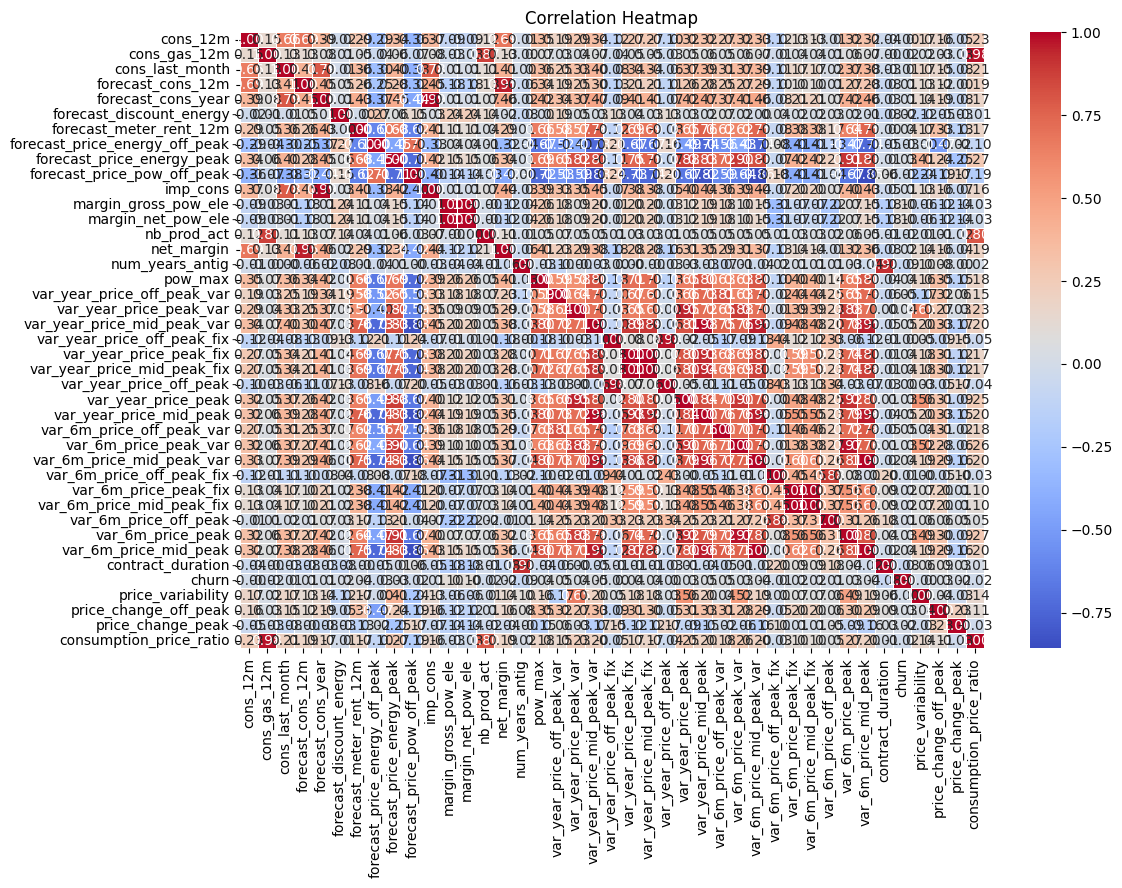

In [32]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = dfchurn.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=12)
plt.show()

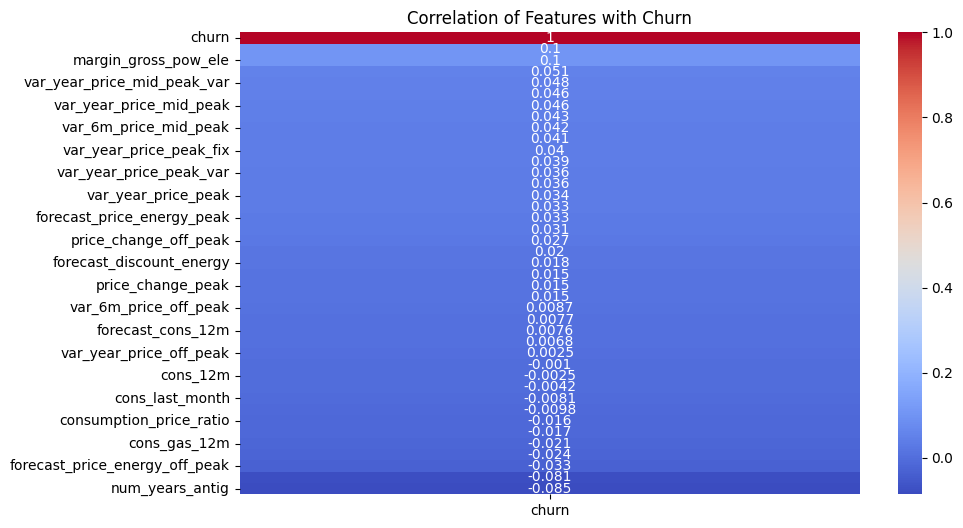

In [33]:
# Correlation of Features with Churn

# Correlation matrix
corr_matrix = dfchurn.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[["churn"]].sort_values(by="churn", ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Churn")
plt.show()


Do everything before building Random Forest ML model and evaluation

### Split The Data

The data is split into training and testing sets to evaluate the model.

In [34]:
# Split data into features and target
x = dfchurn.drop('churn', axis=1)
y = dfchurn['churn']

### Imbalanced Dataset

the churn target feature in the dataset is imbalanced (e.g., significantly more retained customers (0) than churned customers (1)), it can lead to biased models and inaccurate predictions. Resolving Class Imbalance in Target Variable Using Synthetic Minority Oversampling Technique (SMOTE)

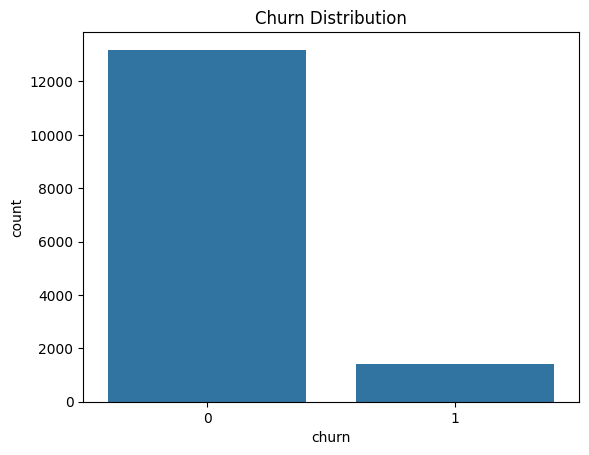

In [35]:
# Distribution of the Target Feature (churn)
sns.countplot(data=dfchurn, x='churn')
plt.title('Churn Distribution')
plt.show()

In [36]:
!pip install imblearn

In [38]:
# Split data into features and target
x = dfchurn.drop('churn', axis=1)
y = dfchurn['churn']

# Inspect for infinite values
print("Number of infinite values before handling:")
print(np.isinf(x).sum().sum())

# Replace infinite values with NaN and then fill with 0
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(0, inplace=True)

# Verify that there are no infinite values left
print("Number of infinite values after handling:")
print(np.isinf(x).sum().sum())


# Handle Class Imbalance
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_res, y_res = sm.fit_resample(x, y)

print('Before OverSampling, the shape of x: {}'.format(x.shape))
print('Before OverSampling, the shape of y: {} \n'.format(y.shape))

print("Before OverSampling, counts of label '1' in y: {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0' in y: {} \n".format(sum(y == 0)))

print('After OverSampling, the shape of x: {}'.format(x_res.shape))
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1' in y: {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0' in y: {}".format(sum(y_res == 0)))

Number of infinite values before handling:
1727
Number of infinite values after handling:
0
Before OverSampling, the shape of x: (14606, 40)
Before OverSampling, the shape of y: (14606,) 

Before OverSampling, counts of label '1' in y: 1419
Before OverSampling, counts of label '0' in y: 13187 

After OverSampling, the shape of x: (26374, 40)
After OverSampling, the shape of y: (26374,) 

After OverSampling, counts of label '1' in y: 13187
After OverSampling, counts of label '0' in y: 13187


SMOTE over-sampling:
churn
1    13187
0    13187
Name: count, dtype: int64


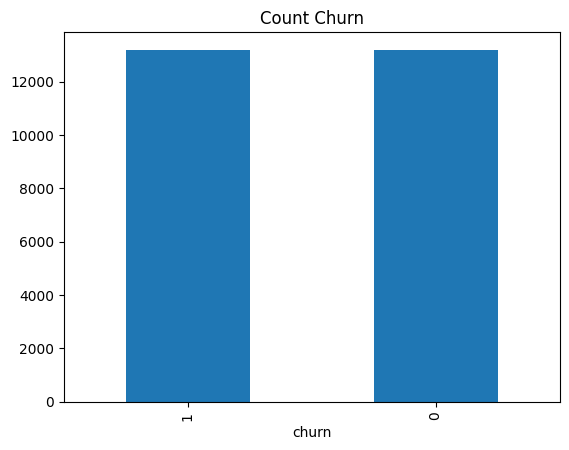

In [39]:
df_smote_over = pd.DataFrame(y_res, columns=['churn'])

print('SMOTE over-sampling:')
print(df_smote_over.churn.value_counts())

df_smote_over.churn.value_counts().plot(kind='bar', title='Count Churn');

Building ML Model - Random Forest